<a href="https://colab.research.google.com/github/akshats13/CNN_happysad/blob/main/cnn_happysad_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib


In [2]:
import tensorflow as tf
import os

In [3]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d billbasener/happy-sad-images


Dataset URL: https://www.kaggle.com/datasets/billbasener/happy-sad-images
License(s): unknown
 97% 65.0M/67.1M [00:00<00:00, 106MB/s] 
100% 67.1M/67.1M [00:00<00:00, 82.8MB/s]


In [7]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile('happy-sad-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/happy-sad-images')

# List the contents of the extracted directory
os.listdir('/content/')


['.config', 'happy-sad-images.zip', 'happy-sad-images', 'sample_data']

In [8]:
# Limiting GPU  consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
import imghdr
import cv2
from matplotlib import pyplot as plt

In [10]:
img = cv2.imread(os.path.join('data','happy','1-2.jpg'))

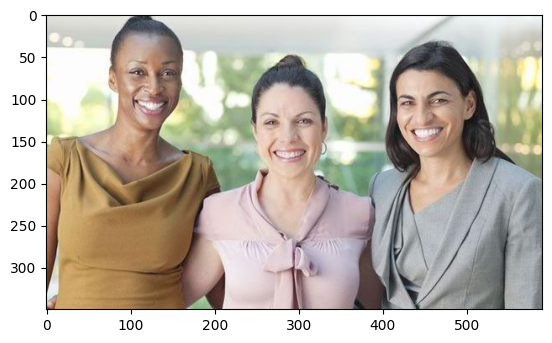

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data') # Loading the dataset from the data directory
data_itr = data.as_numpy_iterator() # Converting the dataset into a Numpy iterator
batch = data_itr.next() # Retreives one batch of images labels
len(batch)

Found 305 files belonging to 2 classes.


2

## Pre-Processing the data

In [ ]:
data = data.map(lambda x,y: (x/255, y)) # Normalizing the data ( x-images, y-labels)


## Spliting the data

In [15]:
len(data)

10

In [16]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [18]:
val_size

2

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
len(train)

6

## Creating the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(  Conv2D(32, (3,3), 1, activation='relu') )
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(  'adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training the model

In [25]:
hist  = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
6/6 [==============================] - 26s 4s/step - loss: 585.5684 - accuracy: 0.4323 - val_loss: 98.1136 - val_accuracy: 0.4844
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 31.9112 - accuracy: 0.5260 - val_loss: 2.5981 - val_accuracy: 0.6719
Epoch 3/20
6/6 [==============================] - 19s 2s/step - loss: 2.5518 - accuracy: 0.5990 - val_loss: 0.3675 - val_accuracy: 0.8281
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 0.4464 - accuracy: 0.8021 - val_loss: 0.4344 - val_accuracy: 0.7656
Epoch 5/20
6/6 [==============================] - 18s 2s/step - loss: 0.4229 - accuracy: 0.8021 - val_loss: 0.4810 - val_accuracy: 0.8281
Epoch 6/20
6/6 [==============================] - 17s 3s/step - loss: 0.3818 - accuracy: 0.8594 - val_loss: 0.2945 - val_accuracy: 0.9219
Epoch 7/20
6/6 [==============================] - 18s 2s/step - loss: 0.3093 - accuracy: 0.8750 - val_loss: 0.2296 - val_accuracy: 0.9531
Epoch 8/20
6/6 [==============

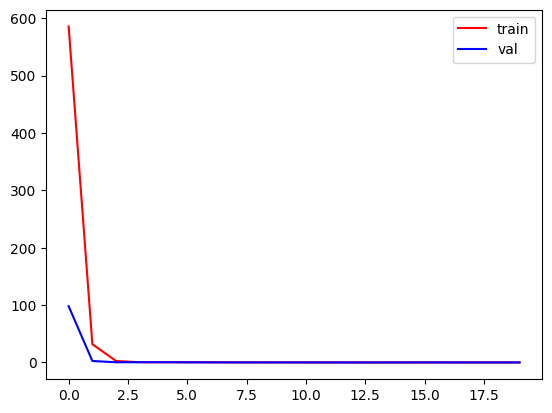

In [26]:
plt.plot(hist.history['loss'], color='red', label='train')
plt.plot(hist.history['val_loss'], color='blue', label='val')
plt.legend()
plt.show()

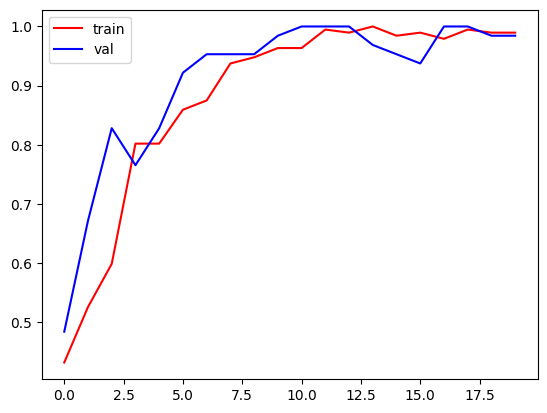

In [27]:
plt.plot(hist.history['accuracy'], color='red', label='train')
plt.plot(hist.history['val_accuracy'], color='blue', label='val')
plt.legend()
plt.show()

## Evaluating the model performance

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 309ms/step


In [31]:
len(test)

2

In [33]:
print(f'Precision:{pre.result().numpy()}')
print(f'Recall:{re.result().numpy()}')
print(f'Accuracy:{acc.result().numpy()}')

Precision:1.0
Recall:0.9677419066429138
Accuracy:0.9795918464660645


## Testing the model

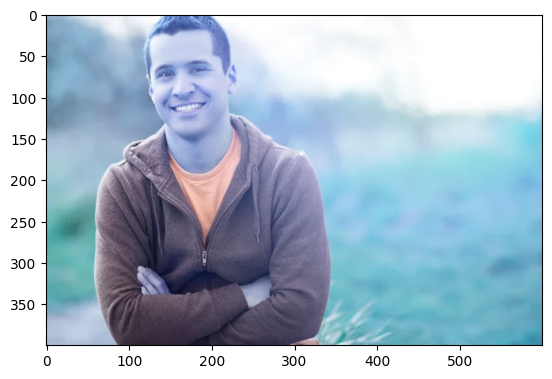

In [41]:
img1 = cv2.imread(os.path.join('happytest.jpg'))
plt.imshow(img1)

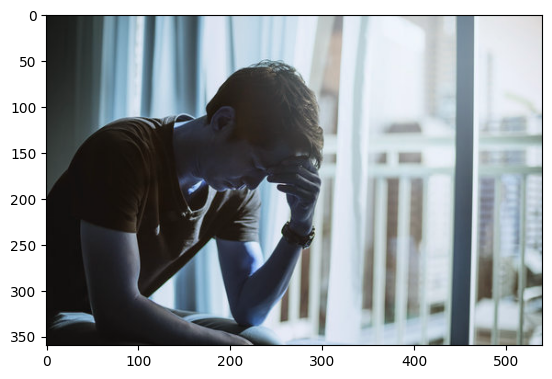

In [48]:
img2 = cv2.imread(os.path.join('sadtest.jpg'))
plt.imshow(img2)

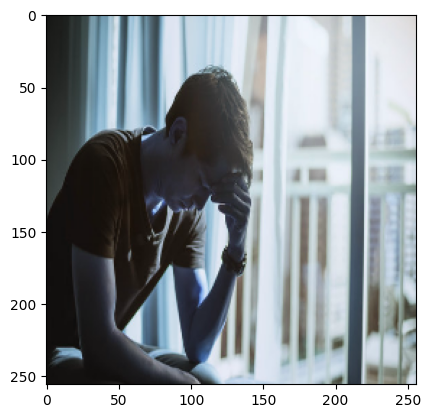

In [49]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))